### <span style='color:DarkBlue'>1.1 Data loading</span>

In [ ]:
! pip install pycaret

In [21]:
import pandas as pd
# We shall import the dataset which is nasa.csv file to implement our project
df = pd.read_csv("nasa.csv")
#We are dropping the columns which seem to be repititve in our case. Like the measurement sin miles and kms are redundant. Only one of the units
# is sufficient in our case
#Values like orbit determination date are not very much needed and can be discarded
df = df.drop(columns=['Close Approach Date','Orbit Determination Date','Neo Reference ID', 'Name', 'Orbiting Body', 'Orbit ID',
                      'Orbit Determination Date', 'Equinox',"Est Dia in KM(max)",'Est Dia in Feet(max)','Est Dia in M(min)',
                      'Est Dia in M(max)',"Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(min)",
                      'Relative Velocity km per hr',"Miles per hour","Miss Dist.(lunar)","Miss Dist.(kilometers)","Miss Dist.(miles)"])

In [22]:
# We are converting the values to numerical values
# +ve cases is 1 and -ve cases is 0
df['Hazardous'] = df['Hazardous'].astype('int64')

#### Get the dimention of dataset

In [23]:
df.shape

(4687, 21)

#### Setup parameters for classification models (defaults)

In [26]:
pcaClassifier = setup(data=df, target='Hazardous', pca = True, pca_method='linear', remove_outliers=True, outliers_threshold=0.05)
compare_models()

,Description,Value
0,Session id,3485
1,Target,Hazardous
2,Target type,Binary
3,Original data shape,"(4687, 21)"
4,Transformed data shape,"(4523, 21)"
5,Transformed train set shape,"(3116, 21)"
6,Transformed test set shape,"(1407, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9521,0.9717,0.8807,0.8336,0.8555,0.8269,0.8281,0.5740
xgboost,Extreme Gradient Boosting,0.9497,0.9828,0.8334,0.8523,0.8417,0.8119,0.8126,0.7180
lightgbm,Light Gradient Boosting Machine,0.9470,0.9816,0.8106,0.8545,0.8293,0.7980,0.8002,2.6160
ada,Ada Boost Classifier,0.9436,0.9801,0.7956,0.8448,0.8184,0.7851,0.7863,0.7880
gbc,Gradient Boosting Classifier,0.9409,0.9777,0.7785,0.8440,0.8084,0.7736,0.7754,2.3580
rf,Random Forest Classifier,0.9299,0.9763,0.6534,0.8815,0.7495,0.7099,0.7212,1.3410
et,Extra Trees Classifier,0.9229,0.9794,0.5492,0.9509,0.6953,0.6549,0.6878,0.7960
lda,Linear Discriminant Analysis,0.9213,0.9702,0.7483,0.7625,0.7543,0.7075,0.7083,0.4590
ridge,Ridge Classifier,0.9137,0.0000,0.4964,0.9419,0.6482,0.6046,0.6459,0.3840
dt,Decision Tree Classifier,0.8890,0.8031,0.6762,0.6494,0.6620,0.5957,0.5962,0.5490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8994,0.8232,0.7115,0.6727,0.6916,0.6315,0.6319
1,0.8811,0.8045,0.6923,0.6102,0.6486,0.5774,0.5791
2,0.8872,0.7956,0.6604,0.6481,0.6542,0.5868,0.5869
3,0.8811,0.7920,0.6604,0.6250,0.6422,0.5710,0.5713
4,0.8994,0.8258,0.7170,0.6786,0.6972,0.6370,0.6373
5,0.8994,0.8181,0.6981,0.6852,0.6916,0.6315,0.6315
6,0.8963,0.8163,0.6981,0.6727,0.6852,0.6232,0.6233
7,0.8811,0.7615,0.5849,0.6458,0.6139,0.5438,0.5447
8,0.8902,0.8203,0.7170,0.6441,0.6786,0.6126,0.6139


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

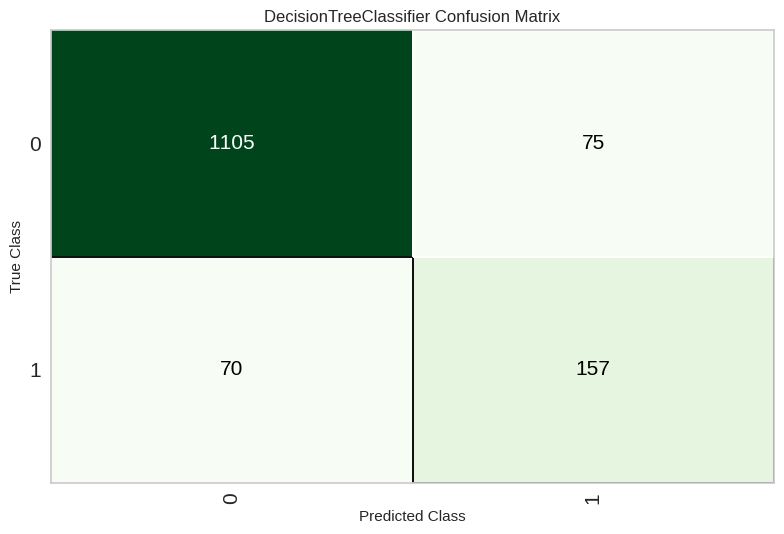

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8232,0.5525,0.0192,0.1250,0.0333,-0.0093,-0.0145
1,0.8323,0.4831,0.0385,0.2857,0.0678,0.0314,0.0514
2,0.8201,0.4921,0.0189,0.1250,0.0328,-0.0100,-0.0157
3,0.8201,0.5346,0.0377,0.2000,0.0635,0.0129,0.0185
4,0.8079,0.4780,0.0377,0.1429,0.0597,-0.0084,-0.0107
5,0.8262,0.5223,0.0566,0.3000,0.0952,0.0463,0.0667
6,0.8140,0.4966,0.0189,0.1000,0.0317,-0.0206,-0.0297
7,0.7957,0.5436,0.0377,0.1111,0.0563,-0.0279,-0.0330
8,0.8201,0.5110,0.0377,0.2000,0.0635,0.0129,0.0185


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

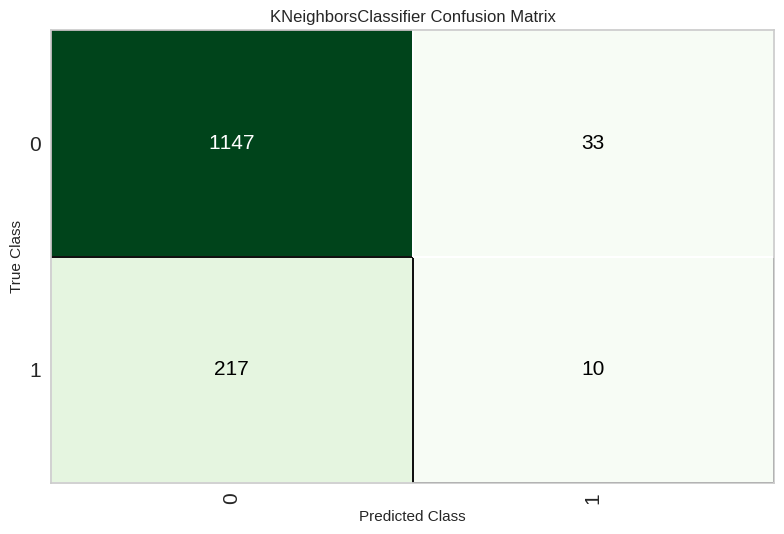

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9360,0.9854,0.6538,0.9189,0.7640,0.7282,0.7423
1,0.9268,0.9791,0.6346,0.8684,0.7333,0.6921,0.7036
2,0.9177,0.9661,0.6604,0.7955,0.7216,0.6738,0.6779
3,0.9299,0.9766,0.6415,0.8947,0.7473,0.7078,0.7210
4,0.9390,0.9835,0.6792,0.9231,0.7826,0.7481,0.7600
5,0.9360,0.9741,0.6792,0.9000,0.7742,0.7377,0.7477
6,0.9512,0.9897,0.7170,0.9744,0.8261,0.7985,0.8112
7,0.9085,0.9585,0.5283,0.8485,0.6512,0.6018,0.6242
8,0.9329,0.9795,0.6792,0.8780,0.7660,0.7276,0.7357


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

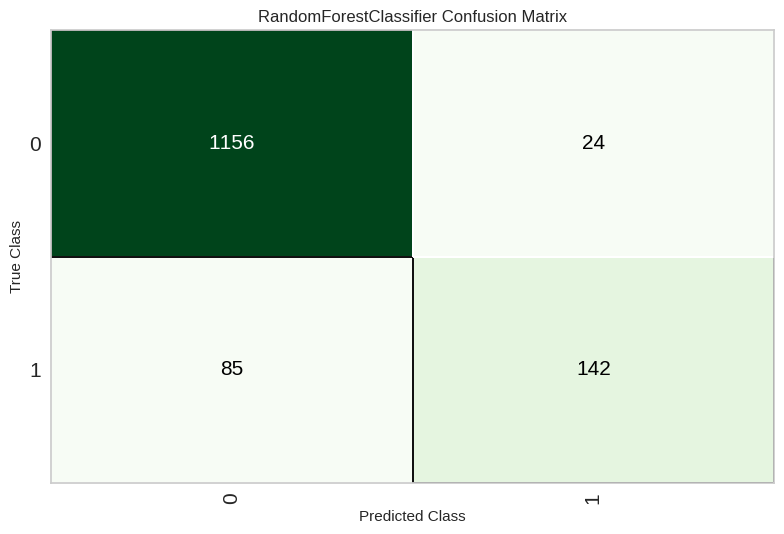

In [27]:
dt = create_model('dt')
plot_model(dt, plot='confusion_matrix')
knn = create_model('knn')
plot_model(knn, plot='confusion_matrix')
rf = create_model('rf')
plot_model(rf, plot='confusion_matrix')


### <span style='color:DarkBlue'>1.4 Plot the Best Model</span>

##### Plot AUC

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9573,0.9827,0.8462,0.8800,0.8627,0.8375,0.8377
1,0.9390,0.9760,0.8269,0.7963,0.8113,0.7750,0.7752
2,0.9482,0.9875,0.8113,0.8600,0.8350,0.8042,0.8047
3,0.9146,0.9664,0.6415,0.7907,0.7083,0.6590,0.6639
4,0.9482,0.9898,0.7736,0.8913,0.8283,0.7979,0.8007
5,0.9512,0.9879,0.7925,0.8936,0.8400,0.8113,0.8134
6,0.9390,0.9791,0.7736,0.8367,0.8039,0.7679,0.7687
7,0.9268,0.9739,0.7736,0.7736,0.7736,0.7299,0.7299
8,0.9177,0.9668,0.8302,0.7097,0.7652,0.7157,0.7189


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

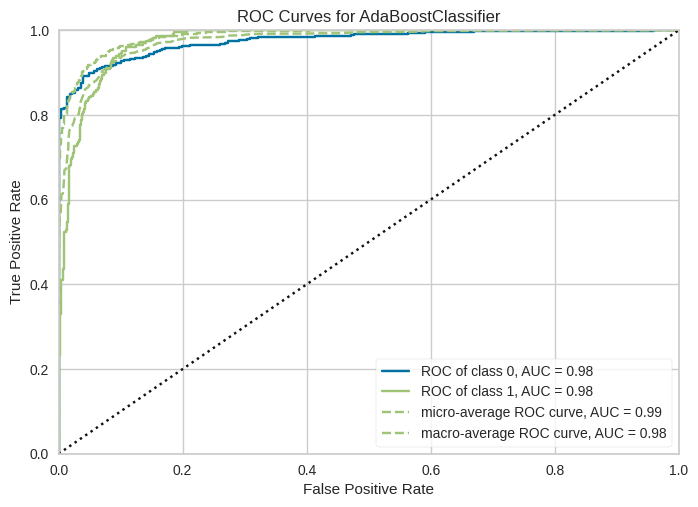

In [10]:
adaModel = create_model('ada')
plot_model(adaModel, plot='auc')

##### Plot Precision Recall Curve

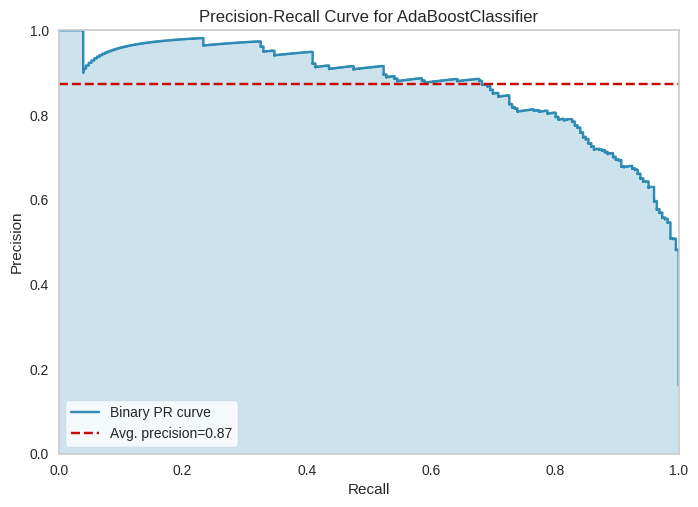

In [11]:
plot_model(adaModel, plot='pr')

##### Plot Confusion Matrix

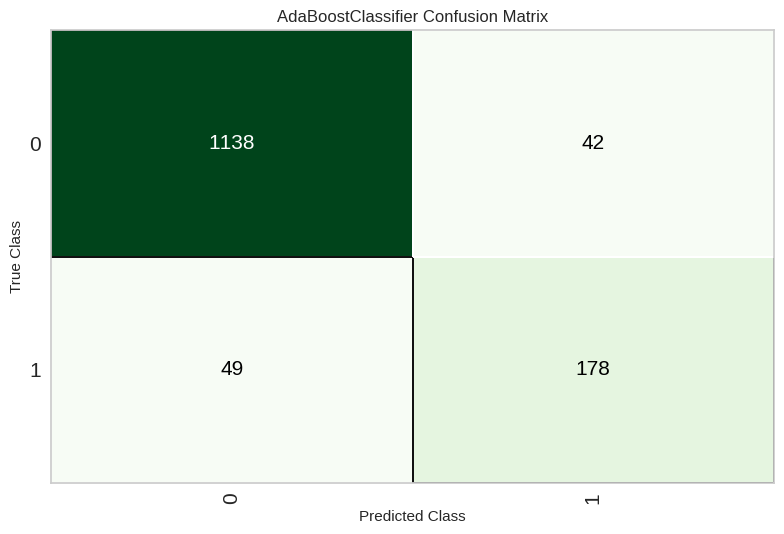

In [12]:
plot_model(adaModel, plot='confusion_matrix')

##### Plot error

##### Plot Class Report

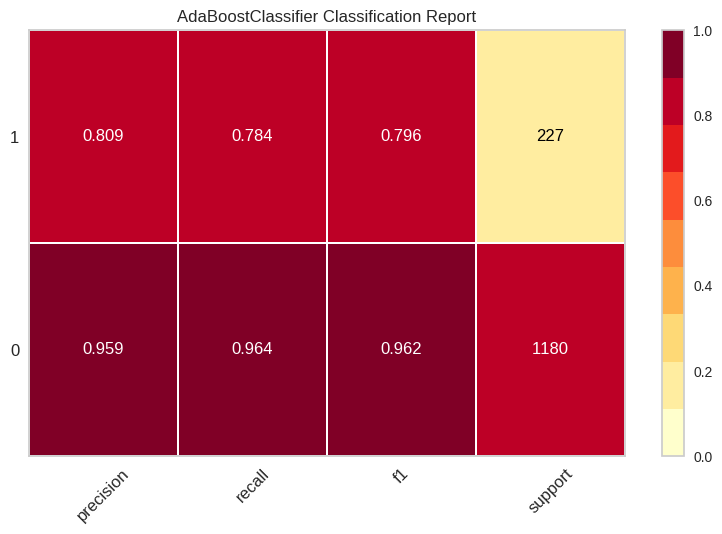

In [14]:
plot_model(adaModel, plot='class_report')

##### Plot Learning

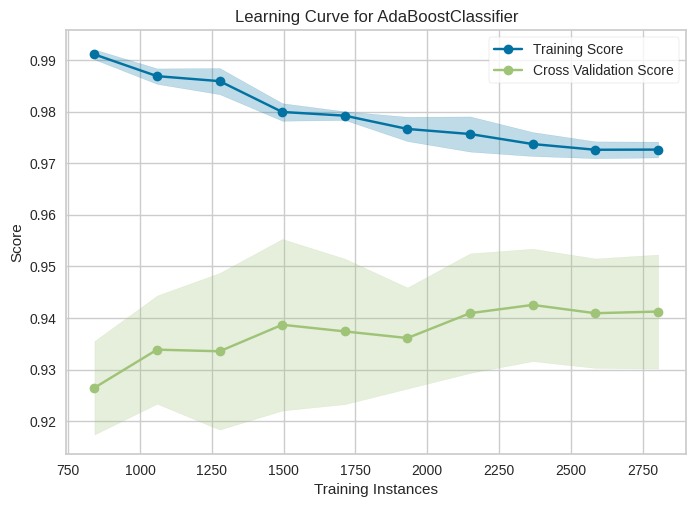

In [16]:
plot_model(adaModel, plot='learning')

##### Plot Feature Importance

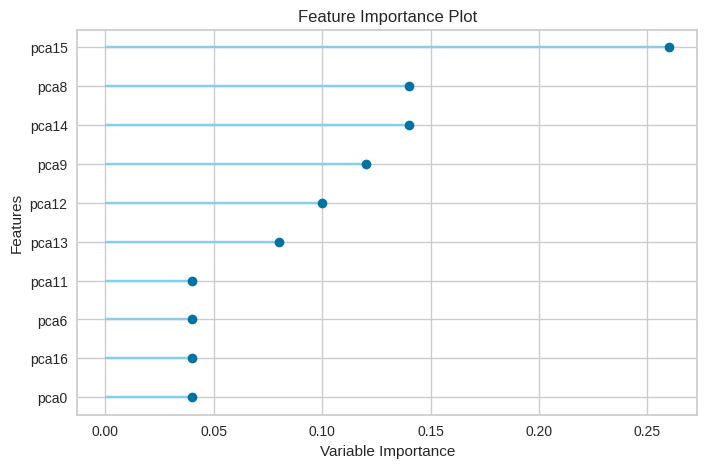

In [17]:
plot_model(adaModel, plot='feature')